# Modelling COVID-19 based on COVID-19 data and Google Community Mobility data.

# <h1>Table of Contents</h1>
<ol type='1'>
<li><h2><a href="#preparation">Data Preparation</a></h2></li>
<li><h2><a href="#impact">Impact Analysis</a></h2></li>
<ol type='a'>
<li><h3><a href="#impact">Approach and Techniques</a></h3></li>
<li><h3><a href="#impact_results">Observations</a></h3></li>
</ol>
<li><h2><a href="#trend">Trend Analysis</a></h2></li>
<ol type='a'>
<li><h3><a href="#trend">Approach and Techniques</a></h3></li>
<li><h3><a href="#trend_results">Observations</a></h3></li>
</ol>
<li><h2><a href="#correlation">Correlation Analysis</a></h2></li>
<ol type='a'>
<li><h3><a href="#correlation">Approach and Techniques</a></h3></li>
<li><h3><a href="#correlation_results">Observations</a></h3></li>
</ol>
<li><h2><a href="#summary">Summary</a></h2></li>
<li><h2><a href="#references">References</a></h2></li>
</ol>

<h1><a name="preparation">Data Preparation: Description of Methods</a></h1>

In [1]:
#Description of process

In [2]:
# import libraries for the project
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
rw_mobility= pd.read_csv("rw-mobility-covid-data.csv")
rw_mobility.head()


,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,total_cases,new_cases,new_cases_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
0,2020-02-15,8.0,5.0,7.0,12.0,5.0,-2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-16,1.0,-1.0,-2.0,5.0,6.0,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-17,1.0,0.0,8.0,5.0,7.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-18,0.0,-2.0,9.0,0.0,4.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-19,-4.0,-8.0,7.0,1.0,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
rw_mobility.tail()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,total_cases,new_cases,new_cases_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
743,2022-02-27,50.0,28.0,111.0,26.0,23.0,16.0,129489.0,4.0,16.714,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
744,2022-02-28,53.0,23.0,135.0,22.0,26.0,16.0,129502.0,13.0,17.714,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
745,2022-03-01,56.0,21.0,136.0,15.0,25.0,15.0,129516.0,14.0,13.857,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
746,2022-03-02,49.0,15.0,131.0,14.0,24.0,17.0,129533.0,17.0,13.857,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
747,2022-03-03,64.0,25.0,167.0,28.0,28.0,14.0,129543.0,10.0,10.714,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543


In [6]:
#Actual data preparation
rw_mobility.shape # checking the shape 

(748, 57)

In [7]:
rw_mobility.columns

Index(['date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'new_tests',
       'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'ne

In [8]:
rw_mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 57 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                748 non-null    object 
 1   retail_and_recreation_percent_change_from_baseline  748 non-null    float64
 2   grocery_and_pharmacy_percent_change_from_baseline   748 non-null    float64
 3   parks_percent_change_from_baseline                  748 non-null    float64
 4   transit_stations_percent_change_from_baseline       748 non-null    float64
 5   workplaces_percent_change_from_baseline             748 non-null    float64
 6   residential_percent_change_from_baseline            748 non-null    float64
 7   total_cases                                         720 non-null    float64
 8   new_cases                                           720 non-null    float64
 9  

In [9]:
rw_mobility.sample(10)

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,total_cases,new_cases,new_cases_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
357,2021-02-06,-56.0,-56.0,-17.0,-69.0,-43.0,35.0,16337.0,151.0,174.143,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
524,2021-07-23,-49.0,-51.0,0.0,-62.0,-53.0,42.0,62328.0,953.0,1396.571,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
573,2021-09-10,35.0,2.0,37.0,-3.0,-3.0,12.0,92025.0,470.0,407.571,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
655,2021-12-01,49.0,10.0,46.0,11.0,8.0,8.0,100362.0,13.0,12.143,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
645,2021-11-21,33.0,9.0,36.0,3.0,3.0,10.0,100217.0,10.0,11.571,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
633,2021-11-09,43.0,7.0,40.0,7.0,10.0,9.0,100000.0,22.0,33.571,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
95,2020-05-20,-30.0,-23.0,-4.0,-33.0,-27.0,13.0,314.0,6.0,3.857,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
309,2020-12-20,-9.0,-19.0,11.0,-15.0,-15.0,19.0,7293.0,61.0,90.571,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
536,2021-08-04,10.0,-4.0,29.0,-14.0,-23.0,19.0,73610.0,769.0,815.429,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
706,2022-01-21,34.0,4.0,47.0,3.0,14.0,18.0,127655.0,428.0,462.286,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543


# Checking missing values in dataset

In [10]:
# checking NaNs
rw_mobility.isna().sum()

date                                                    0
retail_and_recreation_percent_change_from_baseline      0
grocery_and_pharmacy_percent_change_from_baseline       0
parks_percent_change_from_baseline                      0
transit_stations_percent_change_from_baseline           0
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline                0
total_cases                                            28
new_cases                                              28
new_cases_smoothed                                     34
total_deaths                                          105
new_deaths                                            105
new_deaths_smoothed                                   111
total_cases_per_million                                28
new_cases_per_million                                  28
new_cases_smoothed_per_million                         34
total_deaths_per_million                              105
new_deaths_per

# Below is graphical representations of missing values in our dataset

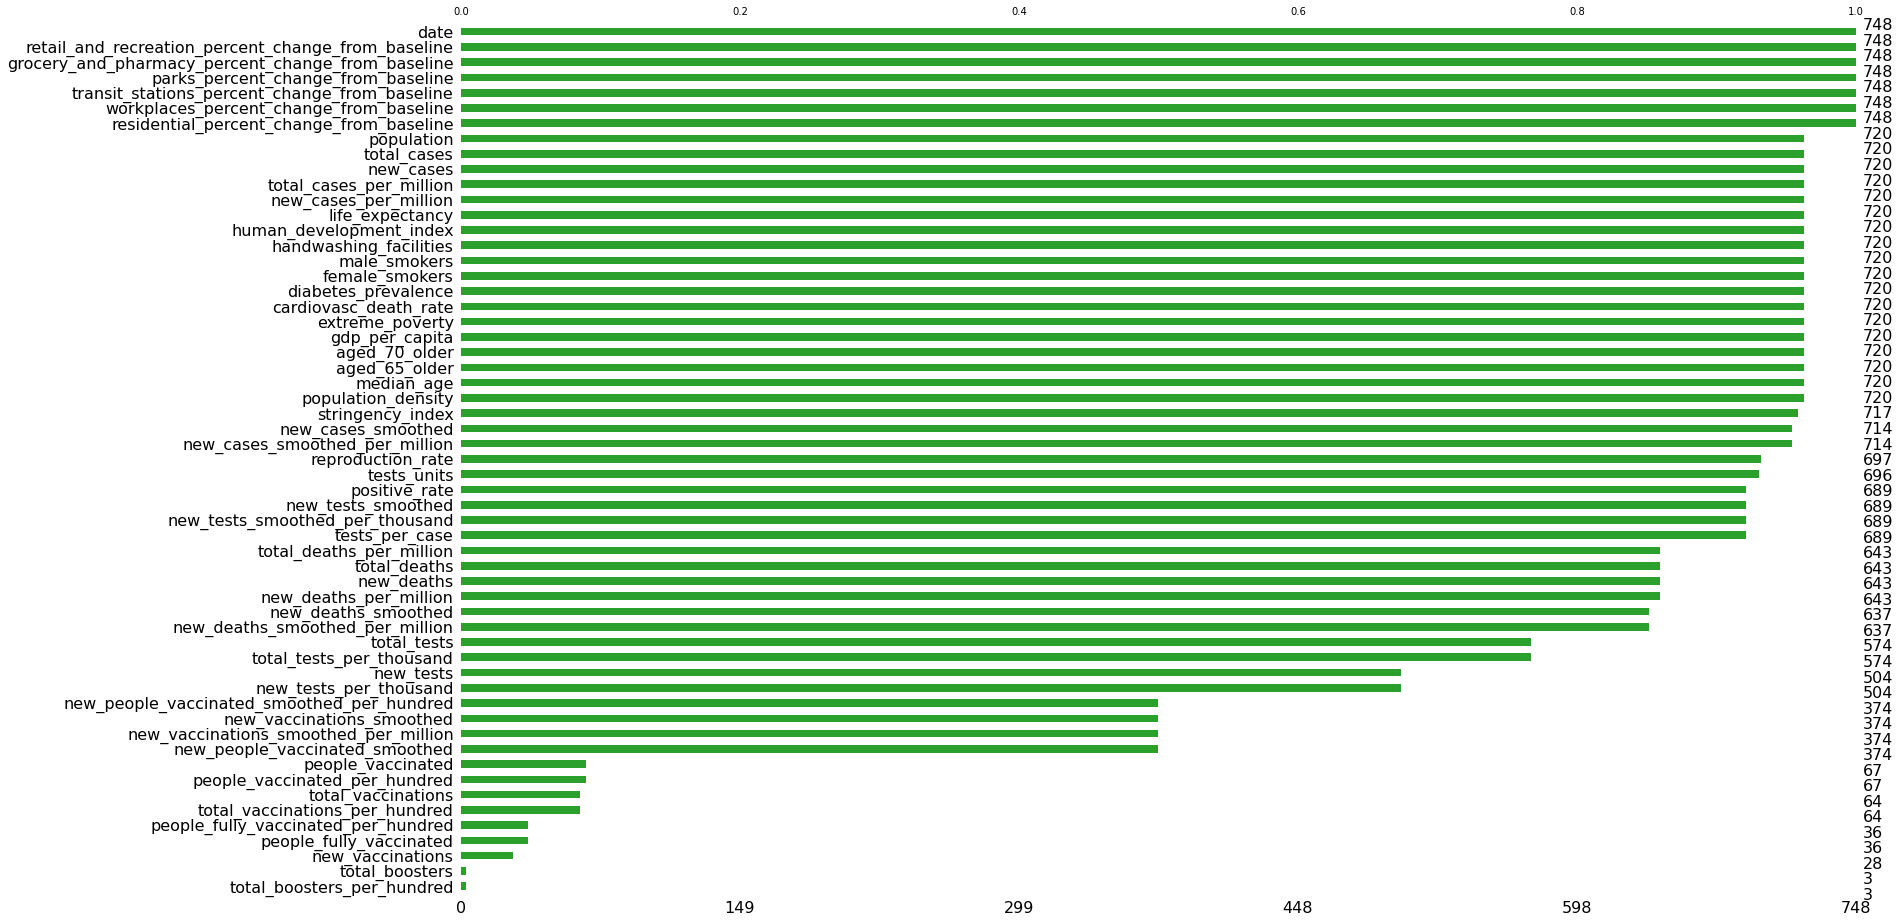

In [11]:
msno.bar(rw_mobility, sort='ascending', color='tab:green') # Visual representation of missing values 
plt.show()

# From above both methods of checking missing values we can notice the following 
1. Here, we can see that each column requires 748 data points, yet most columns contain missing values. 
2. After observing that numerous columns had missing data, I felt skeptical and conducted more research to discover that the first COVID instance happened in Rwanda on March 14, 2020. This demonstrates the existence of missing values in the COVID-19 column data.

# Now that we found there are missing values in our dataset, we need to handle them. The following are steps I followed while filling missing values in dataset:
1. All coumns which have a unique value in them, were filled by that value
2. The stringency index column: initially, I interpolated to fill the last three missing values; this is because this column displays government actions, which means that the measures that are now in place may remain for a week or two. Next, I filled the first 28 rows of this column with zeros because there were no COVID measures before COVID-19 reached Rwanda, so I opted to fill that initial portion with zeros.
3. Other remaining values were filled up with zeros. This is due to the fact that the majority of these columns are connected to cases, deaths, and other things, implying that the lack of a value indicates that no case or death was recorded.


In [12]:
for i in rw_mobility.columns:
  if rw_mobility[i].nunique()==1:
    rw_mobility[i].fillna(rw_mobility[i].unique()[1],inplace=True)
  elif i == 'stringency_index':
    rw_mobility[i].interpolate(inplace=True)
  else:
    rw_mobility[i].fillna(0,inplace=True)
rw_mobility.fillna(0,inplace=True)

In [13]:
rw_mobility.isna().sum() # re-checking NaN values

date                                                  0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
total_cases                                           0
new_cases                                             0
new_cases_smoothed                                    0
total_deaths                                          0
new_deaths                                            0
new_deaths_smoothed                                   0
total_cases_per_million                               0
new_cases_per_million                                 0
new_cases_smoothed_per_million                        0
total_deaths_per_million                              0
new_deaths_per_million                          

# checking relevant features in dataset by checking uniqueness in different fields

If a feature has less than or equal to two values, it is regarded irrelevant, indicating that it has no value to offer to our analysis; hence, that feature was dropped.

In [14]:
rw_mobility['life_expectancy'].unique()

array([69.02])

In [15]:
rw_mobility['human_development_index'].unique()

array([0.543])

# Dealing with Irrelevant features

In [16]:
"""
Utility function to check for irrelevant feature \
To eliminate irrelevant features, I checked any feature with a value of less than or equal to two, and that feature was removed. \
The rationale for doing so is that these attributes do not add significantly to our study; for example, a country's life expectancy cannot vary in two years.
"""

def relevant_features(col_list):
  for col in col_list:
    uniq= rw_mobility[col].nunique()
    if uniq <=2:
      rw_mobility.drop(columns=[col],axis = 1, inplace=True)
    else:
      continue
  return rw_mobility


In [17]:
rw_mobility_updated = relevant_features(rw_mobility.columns)
rw_mobility_updated.head()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,total_cases,new_cases,new_cases_smoothed,...,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index
0,2020-02-15,8.0,5.0,7.0,12.0,5.0,-2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-16,1.0,-1.0,-2.0,5.0,6.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-17,1.0,0.0,8.0,5.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-18,0.0,-2.0,9.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-19,-4.0,-8.0,7.0,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# We were able to reduce our variables from 57 to 42 after removing irrelevant features.

In [18]:
rw_mobility.columns[7:]

Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'new_tests',
       'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index'],
      d

### Secondly, we must address certain redundant features in our dataset. To do so, I examined the relationship between various features, such as total cases and total cases per million, which virtually carry the same information. However, to properly validate my intuition, I performed preliminary feature correlations and discovered that some features are highly correlated with one another, implying that they carry the same information, and hence eliminating these features was a possibility.

In [19]:
rw_mobility[['total_cases','total_cases_per_million']].sample(10)

,total_cases,total_cases_per_million
462,26658.0,2007.906
579,94478.0,7116.174
406,21370.0,1609.609
282,5726.0,431.288
183,2453.0,184.762
614,99288.0,7478.467
686,112654.0,8485.207
416,22862.0,1721.988
620,99514.0,7495.490
382,19198.0,1446.012


In [20]:
rw_mobility[['new_cases','new_cases_per_million']].tail()

,new_cases,new_cases_per_million
743,4.0,0.301
744,13.0,0.979
745,14.0,1.054
746,17.0,1.280
747,10.0,0.753


[]

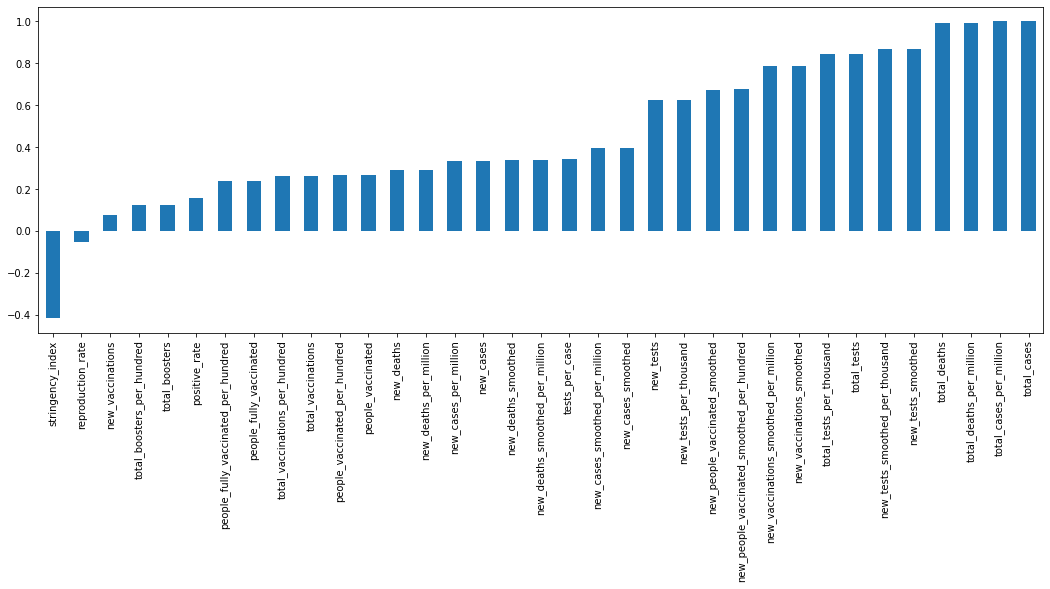

In [21]:
rw_mobility.iloc[:,7:].corr()["total_cases"].sort_values().plot(kind='bar',figsize=(18,6))
plt.plot()

# Between every feature that has a per as ratio, that ratio does not add much to our analysis, and we can see from the above little correlation that they contribute the same. As a result, having all of them would increase the complexity, thus we decided to remove such features.

In [22]:
column=['total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million',\
                          'total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed_per_thousand','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred',\
                          'total_boosters_per_hundred','new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed_per_hundred']
rw_mobility= rw_mobility.drop(columns=column)
rw_mobility.head()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,total_cases,new_cases,new_cases_smoothed,...,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index
0,2020-02-15,8.0,5.0,7.0,12.0,5.0,-2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-16,1.0,-1.0,-2.0,5.0,6.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-17,1.0,0.0,8.0,5.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-18,0.0,-2.0,9.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-19,-4.0,-8.0,7.0,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# writing to csv file
rw_mobility.to_csv("sabayo_project.csv")

<h1><a name="impact">Impact Analysis: Approach and Techniques</a></h1>

In [24]:
rw_mobility.columns
rw_mobility.rename(columns={'retail_and_recreation_percent_change_from_baseline':'Retail','grocery_and_pharmacy_percent_change_from_baseline':'Grocery','parks_percent_change_from_baseline':'Parks',\
                                'transit_stations_percent_change_from_baseline':'Transit Stations','workplaces_percent_change_from_baseline':'Workplaces','residential_percent_change_from_baseline':'Residential'},inplace=True)

In [25]:
# Scalling our dataset
rw_mobility.set_index('date',inplace=True)
scale = StandardScaler()
rw_mobility_update = pd.DataFrame(scale.fit_transform(rw_mobility.values), columns=rw_mobility.columns, index=rw_mobility.index)
rw_mobility_update.head()

,Retail,Grocery,Parks,Transit Stations,Workplaces,Residential,total_cases,new_cases,new_cases_smoothed,total_deaths,...,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,0.181406,0.735077,-0.254127,1.166620,0.947464,-1.992974,-0.86963,-0.55892,-0.6156,-0.863748,...,-0.862801,-0.6664,-0.170302,-0.185834,-0.151104,-0.061291,-0.095885,-0.545164,-0.507902,-3.565064
2020-02-16,-0.043995,0.447028,-0.616427,0.879637,0.997299,-1.875231,-0.86963,-0.55892,-0.6156,-0.863748,...,-0.862801,-0.6664,-0.170302,-0.185834,-0.151104,-0.061291,-0.095885,-0.545164,-0.507902,-3.565064
2020-02-17,-0.043995,0.495036,-0.213871,0.879637,1.047134,-1.757488,-0.86963,-0.55892,-0.6156,-0.863748,...,-0.862801,-0.6664,-0.170302,-0.185834,-0.151104,-0.061291,-0.095885,-0.545164,-0.507902,-3.565064
2020-02-18,-0.076196,0.399020,-0.173616,0.674650,0.897629,-1.757488,-0.86963,-0.55892,-0.6156,-0.863748,...,-0.862801,-0.6664,-0.170302,-0.185834,-0.151104,-0.061291,-0.095885,-0.545164,-0.507902,-3.565064
2020-02-19,-0.204996,0.110971,-0.254127,0.715648,0.797959,-1.639745,-0.86963,-0.55892,-0.6156,-0.863748,...,-0.862801,-0.6664,-0.170302,-0.185834,-0.151104,-0.061291,-0.095885,-0.545164,-0.507902,-3.565064


In [26]:
rw_mobility_update.reset_index(inplace=True)

In [27]:
col_list =['date','Retail','Grocery','Parks','Transit Stations','Workplaces','Residential','stringency_index']
rw_mobility_sub = rw_mobility_update[col_list]


In [28]:
#This creates an interactive graph that allows some user interaction.
#Draw all lines
plt.figure(figsize=(12, 10))
fig = px.line(rw_mobility_sub, x='date', y=rw_mobility_sub.columns,
              hover_data={"date": "|%B %d, %Y"},
              title='Percentage Change in Mobility to Places')

fig.update_xaxes(
    #M1- every two months
    dtick="M1",\
    #set up range slider
    rangeslider_visible=True) 

# Set figure title
fig.update_layout(title_text=" Mobility  patterns based on government action (stringency_index)",\
                  font=dict(family="Arial",size=12, color='green'))
#Set labels for both axes
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Percentage (%) Change')
fig.show()

<Figure size 864x720 with 0 Axes>

# Based on total cases

In [29]:

col_list1 =['Retail','Grocery','Parks','Transit Stations','Workplaces','Residential','new_cases']


#Draw all lines
plt.figure(figsize=(12, 10))
fig = px.line(rw_mobility_update, x="date", y=col_list1,
              hover_data={"date": "|%B %d, %Y"},
              title='Percentage Change in Mobility to Places')

fig.update_xaxes(
    #M1- every two months
    dtick="M1",\
    #set up range slider
    rangeslider_visible=True) 

# Set figure title
fig.update_layout(title_text=" Mobility  patterns based on COVID-19 incidences(Cases)",\
                  font=dict(family="Arial",size=12, color='green'))
#Set labels for both axes
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Percentage (%) Change')
fig.show()

<Figure size 864x720 with 0 Axes>

# Based on total deaths

In [30]:
col_list2 =['Retail','Grocery','Parks','Transit Stations','Workplaces','Residential','new_deaths']

#Draw all lines
plt.figure(figsize=(12, 10))
fig = px.line(rw_mobility_update, x="date", y=col_list2,
              hover_data={"date": "|%B %d, %Y"},
              title='Percentage Change in Mobility to Places')

fig.update_xaxes(
    #M1- every two months
    dtick="M1",\
    #set up range slider
    rangeslider_visible=True) 

# Set figure title
fig.update_layout(title_text="Mobility  patterns based on COVID-19 incidences(deaths)",\
                  font=dict(family="Arial",size=12, color='green'))
#Set labels for both axes
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Percentage (%) Change')
fig.show()

<Figure size 864x720 with 0 Axes>

In [31]:
# pip install dash
# !pip install jupyter-dash

<h1><a name="impact_results">Observations on Impact Analysis </a></h1>

In [32]:
#observations here


# 1. Mobility  patterns based on government action (as captured in stringency_index)
### According to [3], Rwanda reported its first covid case on March 14, 2020, and afterwards, a comprehensive lockdown has been enforced throughout the country, resulting in a rise in residential areas as people were compelled to stay at home and a reduction in movement in other areas. Later in May 2020, the lockdown was lifted, implying a drop in home mobility and an increase in other mobility zones. This pattern lasted until February 2021, when Rwanda recorded a high number of deaths, necessitating curfews and, eventually, a lockdown in April of the same year. Another residential peak occurred in August 2021 as a result of a new type of COVID [3].
# 2.  mobility  patterns based on COVID-19 incidences (Cases)
### As the prevalence of COVID-19 increased, additional cases were reported in Rwanda, and the existence of new cases had a significant impact on several other areas. As previously stated, residential has increased since March 2020 as a result of new cases being registered on a daily basis, and these cases have had a significant impact on retail and grocery as people were forced to stay at home or due to other government restrictions that forced businesses to operate irregularly. There was a decline in transit stations as cases emerged; for example, in August 2021, there was a peak in cases, and public transportation buses were only 30-50 percent functioning at the time. Furthermore, as the number of instances increased, the attendance of employees at work decreased as the work-from-home policy was heavily encouraged.

# 3.  mobility  patterns  based on COVID-19 incidences (Deaths)
### As COVID-19 spread among Rwandans, other mobility facilities were impacted as well. The line shows that Rwanda recorded the first COVID death in May. The graph also shows that there was a high in deaths between December 2020 and March 2021, which caused the residential proportion to climb. This might be due to various government limitations such as curfews and lockdowns, as noted in the preceding findings. COVID-19 deaths not only affected residential areas, but also other places of mobility such as work places, retail, groceries, and transit stations, and the reasons for this were the aforementioned reasons, as deaths increased, forcing the government to implement other measures to reduce death and case rate.

<h1><a name="trend">Trend Analysis: Approach and Techniques</a></h1>

In [33]:
#description of approach and techniques

# Below reference helped me to plot this graph
# Reference: https://plotly.com/python/time-series/
col_list3 = ['Retail','Grocery','Parks','Transit Stations','Workplaces','Residential','new_deaths','new_cases','total_deaths','total_cases']


from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash

app = JupyterDash(__name__)


app.layout = html.Div([
    html.H4('Plot the disease burden and mobility trends over the period'),
    dcc.Graph(id="time-series-chart"),
    html.P("Select Location:"),
    dcc.Dropdown(
        id="ticker",
        options=col_list3,
        multi=True,
        value="Retail",
        clearable=False,
    ),
])


@app.callback(
    Output("time-series-chart", "figure"), 
    Input("ticker", "value"))
def display_time_series(ticker):
    fig = px.line(rw_mobility_update, x='date', y=ticker)
    fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=3, label="Three Months", step="month", stepmode="backward"),
            dict(count=6, label="Six Months", step="month", stepmode="backward"),
            dict(count=1, label="One Year", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
    return fig

app.run_server(mode='inline')


<h1><a name="trend_results">Observations on Trend Analysis</a></h1>

In [34]:
#observations here


# The disease  burden  and  mobility  pattern
1. COVID-19 cases had a substantial influence on Transit Station from March 2020 to January 2022. Few times are where transit stations began to rise and then fell as cases grew; for example, from July 2020 to January 2021, there was a little rise in stations, but they fell again from January 2021 to April of the same year. There was a high of cases that directly affected this mobility location in July of 2021, and we can now observe that transit station has begun to recover since COVID-19 cases are few these days. The same is true for total cases for each time period, and as can be shown, total cases have surpassed this mobility position since July 2021.

2. This observation also applies to workplaces where a large number of cases were recorded throughout each time period, affecting workplaces. Furthermore, the increased number of cases resulted in additional government regulations, including a work-from-home policy for the majority of businesses. In the six-month window, we can see that there was a constant pattern in the workplace for a time, almost 4 months of regular operation, which then dropped between December 2021 and the end of January 2022.

3. Another thing to keep in mind is that residential and cases are directly proportional, which means that whenever the number of cases recorded increased, so did the residential percentage. This could be due to some government measures to curb unnecessary movements in order to reduce covid penetration.

Overall, either cases or deaths have had an impact on mobility patterns in various locations because anytime there was a high record of either, the government would do what was necessary to minimize disease transmission among the people. Disease also has an impact on corporate operations and people's everyday life in general.

<h1><a name="correlation">Correlation Analysis: Approach and Techniques</a></h1>

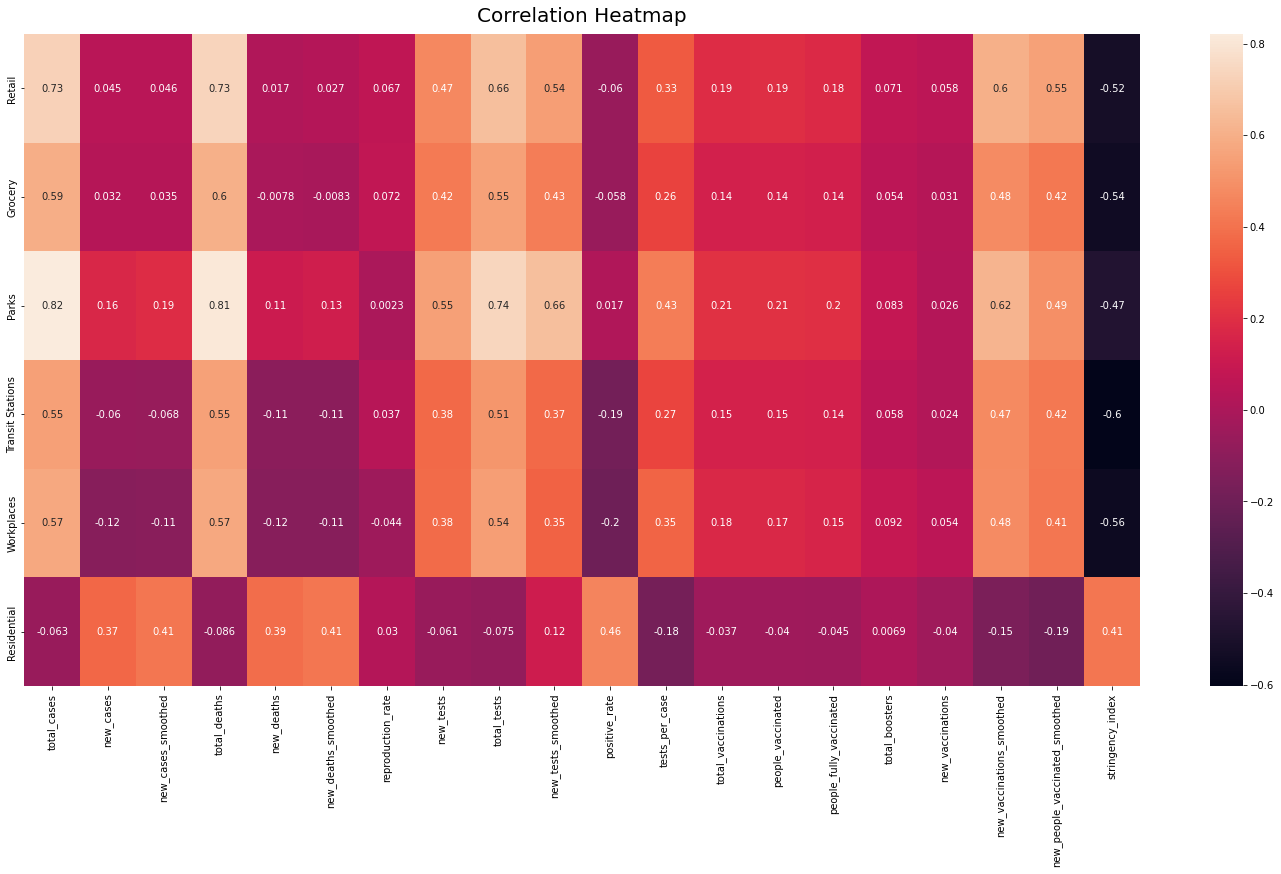

In [35]:
#description of approach and techniques
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(rw_mobility_update.corr().iloc[:6].iloc[:,6:], annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12); # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.


In [36]:
# rw_mobility_sub = rw_mobility_update.iloc[:,:7] # Getting mobility data by slicing the first 6 columns 

mobility_data= rw_mobility_update.iloc[:,:7]
covid_data = rw_mobility_update.iloc[:,7:]
rw_mobility_update.describe()

,Retail,Grocery,Parks,Transit Stations,Workplaces,Residential,total_cases,new_cases,new_cases_smoothed,total_deaths,...,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,stringency_index
count,748.000000,7.480000e+02,7.480000e+02,7.480000e+02,748.000000,7.480000e+02,748.000000,748.000000,7.480000e+02,7.480000e+02,...,7.480000e+02,7.480000e+02,7.480000e+02,748.000000,7.480000e+02,7.480000e+02,7.480000e+02,7.480000e+02,7.480000e+02,7.480000e+02
mean,0.000000,3.799694e-17,-7.599388e-17,7.599388e-17,0.000000,4.749617e-17,0.000000,0.000000,3.799694e-17,-7.599388e-17,...,3.799694e-17,9.499234e-17,3.799694e-17,0.000000,-5.699541e-17,-3.324732e-17,9.499234e-18,3.799694e-17,7.599388e-17,1.519878e-16
std,1.000669,1.000669e+00,1.000669e+00,1.000669e+00,1.000669,1.000669e+00,1.000669,1.000669,1.000669e+00,1.000669e+00,...,1.000669e+00,1.000669e+00,1.000669e+00,1.000669,1.000669e+00,1.000669e+00,1.000669e+00,1.000669e+00,1.000669e+00,1.000669e+00
min,-2.362407,-3.153584e+00,-1.824094e+00,-2.605150e+00,-3.089169,-2.110717e+00,-0.869630,-0.558920,-6.156003e-01,-8.637482e-01,...,-8.628007e-01,-6.664005e-01,-1.703023e-01,-0.185834,-1.511039e-01,-6.129134e-02,-9.588497e-02,-5.451637e-01,-5.079021e-01,-3.565064e+00
25%,-0.559198,-4.651272e-01,-6.969380e-01,-5.142774e-01,-0.497750,-5.800575e-01,-0.808712,-0.516965,-5.648041e-01,-8.440602e-01,...,-6.878237e-01,-5.338601e-01,-1.703023e-01,-0.185834,-1.511039e-01,-6.129134e-02,-9.588497e-02,-5.451637e-01,-5.079021e-01,-5.754775e-01
50%,-0.011795,6.296257e-02,-2.541267e-01,1.416825e-01,0.050435,-2.268284e-01,-0.457405,-0.400783,-4.378172e-01,-4.013089e-01,...,-4.189566e-01,-3.643690e-01,-1.703023e-01,-0.185834,-1.511039e-01,-6.129134e-02,-9.588497e-02,-5.451637e-01,-5.079021e-01,1.187292e-01
75%,0.825409,7.470789e-01,6.818153e-01,7.976425e-01,0.748124,2.441436e-01,1.079189,-0.064339,-7.907741e-02,1.105511e+00,...,3.022901e-01,-1.804270e-02,-1.703023e-01,-0.185834,-1.511039e-01,-6.129134e-02,-9.588497e-02,-2.450564e-01,4.840846e-02,6.526456e-01
max,2.113415,2.079305e+00,6.186765e+00,1.822580e+00,2.193338,3.776434e+00,2.054522,9.355292,4.350136e+00,1.806496e+00,...,4.501738e+00,5.710227e+00,1.112939e+01,9.847198,1.334082e+01,2.097692e+01,1.634741e+01,3.281674e+00,5.079291e+00,1.666856e+00


<h1><a name="correlation_results">Observations on Correlation Analysis</a></h1>

In [37]:
#observations here

# We may deduce the following from the aforesaid statistical correlation between mobility patterns and COVID-19:
Cases, deaths, stringency, vaccination,tests, and a few other COVID-19 features all have a strong correlation with mobility patterns. This is owing to the fact that all of these qualities serve as the foundation for the government to take action to combat the spread of the disease. For example, if the majority of people are vaccinated, all mobility locations will be able to benefit from the actions that the government may implement. Also, because the stringency index includes government actions against the disease, it can alter movement locations in a positive or negative way, which is why it has a significant correlation with mobility patterns. The presence of high or new [cases, deaths] contributes to the increase or fall in these places. As a result, the strong correlation between this COVID-19 data and mobility data makes more sense.

There are also some features that are less related to movement patterns, such as positive rate, reproduction rate, and others.


<h1><a name="summary">Summary</a></h1>

In [38]:
#summary goes here

# a. Data quality
The given dataset comprised merged Covid-19 and Rwanda mobility data, as well as some redundant and irrelevant features in the Covid portion, as well as missing values. During the preprocessing step, columns that were not useful in examining the link between Covid-19 and mobility data in terms of impact, trend, and correlation were removed, and irrelevant and redundant features were also removed. The last phase of preprocessing entailed dealing with missing values, with the bulk of them being supplied with 0 as a safe choice. In addition, the dataset was scaled to give more comprehensible visuals with no significant changes across data points.
# b. Key insights 
The key findings from the preceding sections are that there are significant relationships between COVID-19 data and mobility patterns. Another significant finding is that cases and residential are directly proportional, which indicates that anytime there is a rise or decrease in cases, the residential follows suit since the government eases or strengthens measures proportionately. This also holds true for deaths. Other mobility places, aside from cases, deaths, and residences, are inversely proportional to these COVID cases or deaths, as the rising in one led to the decline in another. In addition, as of early March 2022, COVID-10 cases have decreased and mobility patterns are being restored in many regions. Lastly, Grocery and pharmacy saw the least restrictions as the places were considered essential and therefore has increased activity than the others.
# c. Potential use cases
1. Government instutions for decision making
2. Businesses and company for good planning 
3. WHO for resource allocations and planning 

<h1><a name="references">References</a></h1>

#references
https://www.google.com/covid19/mobility/ 

https://ourworldindata.org/coronavirus/country/rwanda 

[3] https://www.rbc.gov.rw/index.php?id=707 